In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import numpy as np

In [2]:
customer_data = pd.read_csv('./hierarchical-clustering-demo.csv')

In [3]:
customer_data.shape

(200, 5)

In [4]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
#filter the first three columns from our dataset
data = customer_data.iloc[:, 3:5].values
print(data)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

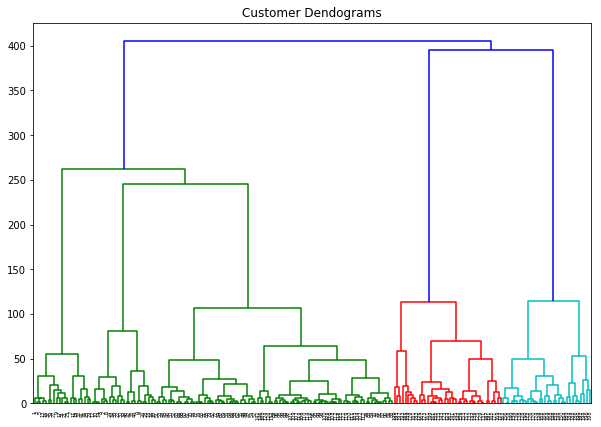

In [6]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

In [7]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

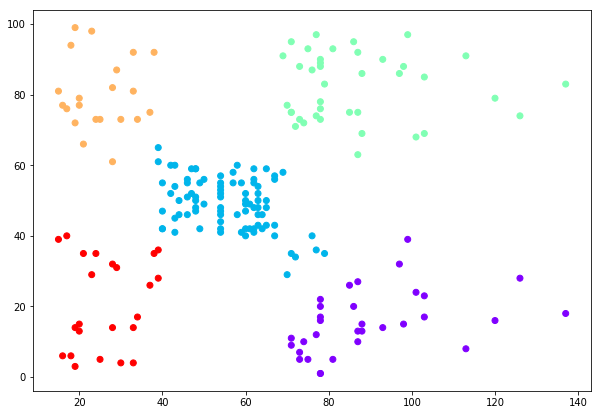

In [8]:
plt.figure(figsize=(10, 7))
plt.scatter(data[:,0], data[:,1], c=cluster.labels_, cmap='rainbow')

In [12]:
import os
import h5py
import numpy as np



In [15]:
with h5py.File('../data/dataset.h5', 'r') as f:
    for person in f.keys():
        print("personName: " + str(person))
        print("personLabel: " + str(f[person].attrs['label']))

        for subgroup in f[person].keys() :
            print("\tsubgroup: " + str(subgroup))

            print("\t\tembedding data: " + str(f[person][subgroup]['embedding'][:4]))
            print("\t\tpath data: " + str(f[person][subgroup].attrs['file_path']))


personName: Alex
personLabel: 0
	subgroup: a1.png
		embedding data: [-0.00873503  0.02642599 -0.09000283 -0.02382483]
		path data: b'/Users/eugene/Documents/Developer/Computer-Vision/pytorch-face/data/embedding_test/Alex/a1.png'
	subgroup: a10.png
		embedding data: [-0.00861818  0.03447757 -0.10577603  0.02123651]
		path data: b'/Users/eugene/Documents/Developer/Computer-Vision/pytorch-face/data/embedding_test/Alex/a10.png'
	subgroup: a11.png
		embedding data: [-0.04201525  0.11203021 -0.08029568 -0.06270844]
		path data: b'/Users/eugene/Documents/Developer/Computer-Vision/pytorch-face/data/embedding_test/Alex/a11.png'
	subgroup: a12.png
		embedding data: [-0.00220192  0.09294408 -0.10747166 -0.02398423]
		path data: b'/Users/eugene/Documents/Developer/Computer-Vision/pytorch-face/data/embedding_test/Alex/a12.png'
	subgroup: a13.png
		embedding data: [ 0.00797372  0.01619037 -0.03253319 -0.01165465]
		path data: b'/Users/eugene/Documents/Developer/Computer-Vision/pytorch-face/data/embe

## Data for each person

personName: Alex
	embedding array shape: (24, 512)
	number of images: 24  embedding size: 512
	label: 0
	subgroup: a1.png
		embedding data shape: (512,)
		embedding data: [-0.00873503  0.02642599 -0.09000283 -0.02382483]
		path data: b'/Users/eugene/Documents/Developer/Computer-Vision/pytorch-face/data/embedding_test/Alex/a1.png'
	label: 1
	subgroup: a10.png
		embedding data shape: (512,)
		embedding data: [-0.00861818  0.03447757 -0.10577603  0.02123651]
		path data: b'/Users/eugene/Documents/Developer/Computer-Vision/pytorch-face/data/embedding_test/Alex/a10.png'
	label: 2
	subgroup: a11.png
		embedding data shape: (512,)
		embedding data: [-0.04201525  0.11203021 -0.08029568 -0.06270844]
		path data: b'/Users/eugene/Documents/Developer/Computer-Vision/pytorch-face/data/embedding_test/Alex/a11.png'
	label: 3
	subgroup: a12.png
		embedding data shape: (512,)
		embedding data: [-0.00220192  0.09294408 -0.10747166 -0.02398423]
		path data: b'/Users/eugene/Documents/Developer/Computer-Vi

		path data: b'/Users/eugene/Documents/Developer/Computer-Vision/pytorch-face/data/embedding_test/Julia/j13.png'
	label: 5
	subgroup: j14.png
		embedding data shape: (512,)
		embedding data: [ 5.0092749e-02 -2.8584128e-02 -3.9045725e-02 -6.7284673e-05]
		path data: b'/Users/eugene/Documents/Developer/Computer-Vision/pytorch-face/data/embedding_test/Julia/j14.png'
	label: 6
	subgroup: j15.png
		embedding data shape: (512,)
		embedding data: [-0.01531272  0.02270621  0.04244421  0.01253065]
		path data: b'/Users/eugene/Documents/Developer/Computer-Vision/pytorch-face/data/embedding_test/Julia/j15.png'
	label: 7
	subgroup: j16.png
		embedding data shape: (512,)
		embedding data: [ 0.06408433  0.0275206  -0.02162912 -0.04697153]
		path data: b'/Users/eugene/Documents/Developer/Computer-Vision/pytorch-face/data/embedding_test/Julia/j16.png'
	label: 8
	subgroup: j17.png
		embedding data shape: (512,)
		embedding data: [ 0.04047828  0.04388688  0.00478077 -0.04507864]
		path data: b'/Users/eu

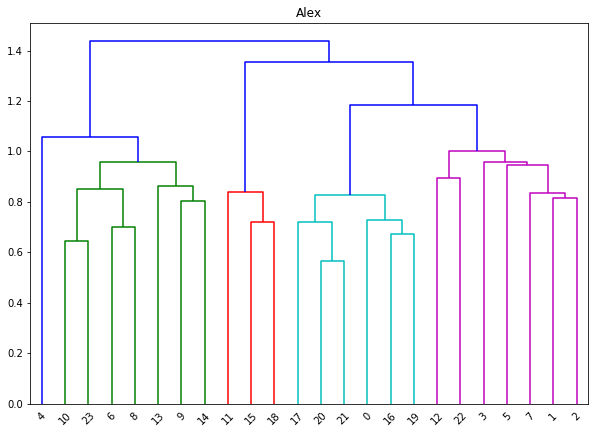

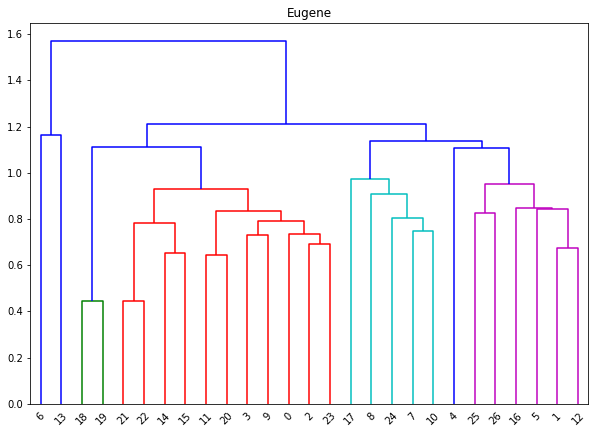

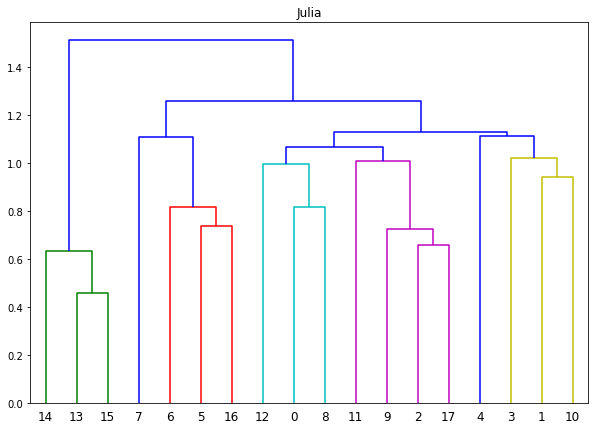

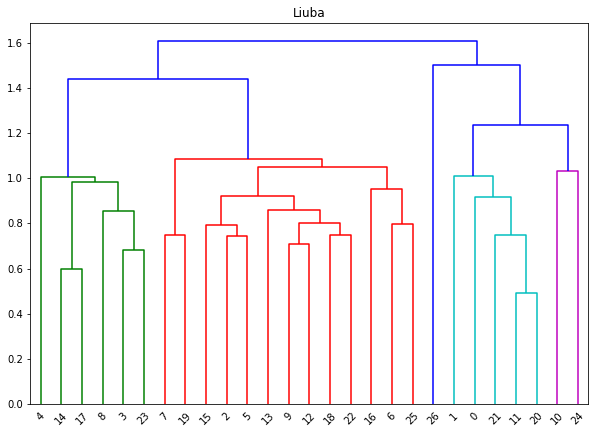

In [16]:
import scipy.cluster.hierarchy as shc

# Data for each person
with h5py.File('../data/dataset.h5', 'r') as f:
    for person in f.keys():
        print("personName: " + str(person))
#         print("personLabel: " + str(f[person].attrs['label']))

        nrof_images = len(f[person].keys())
        embedding_size = 512
        embeddings_array = np.zeros((nrof_images, embedding_size))
        label_array = np.zeros((0,0))
        label_strings_array = np.zeros((0,0))

        print("\tembedding array shape: " + str(embeddings_array.shape))
        print("\tnumber of images: " + str(nrof_images) + "  embedding size: " + str(embedding_size))

        for i, subgroup in enumerate(f[person].keys()):
            print("\tlabel: " + str(i))
            embeddings_array[i, :] = f[person][subgroup]['embedding'][:]
            label_array = np.append(label_array, i)
            
            
            print("\tsubgroup: " + str(subgroup))
            print("\t\tembedding data shape: " + str(f[person][subgroup]['embedding'][:].shape))

            print("\t\tembedding data: " + str(f[person][subgroup]['embedding'][:4]))
            print("\t\tpath data: " + str(f[person][subgroup].attrs['file_path']))

        plt.figure(figsize=(10, 7))
        plt.title(str(person))
        dend = shc.dendrogram(shc.linkage(embeddings_array, method='ward'))
